# Coding discussion 4
### Wenhui Yang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from string import punctuation
punctuation += ("“" + "”") 
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”'

In [3]:
# read in the txt files as strings
with open("bbc-khashoggi.txt","r",encoding ="UTF-8") as file1:
    bbc = file1.read()
with open("cnn-khashoggi.txt","r",encoding ="UTF-8") as file2:
    cnn = file2.read()
with open("fox-khashoggi.txt","r",encoding ="UTF-8") as file3:
    fox = file3.read()
with open("aljazeera-khashoggi.txt","r",encoding ="UTF-8") as file4:
    alja = file4.read()
with open ("breitbart-khashoggi.txt","r",encoding = "UTF-8") as file5:
    breit = file5.read()
    
#read in the stop_words.csv as a list
stop_words_file = pd.read_csv("stop_words.csv")
stop_words = list(stop_words_file.word)

In [4]:
with open("bbc-khashoggi copy.txt","r",encoding ="UTF-8") as file7:
    bbc_removed = file7.read()

In [5]:
def tokenize(text=None):
    text = text.lower()
    text = text.replace("\'","’") # It is noticed that the single quotation marks(‘) are different across articles
    for i in punctuation: 
        text = text.replace(i," ") # use a for loop to remove all the punctuations
    text_list = text.split()
    text_list2 = [word for word in text_list if word not in stop_words]
    return text_list2

In [6]:
def convert_text_to_dtm(txt):
    '''
    Converts text into a document term matrix.
    '''
    d = dict()
    for word in tokenize(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [7]:
# Build a function that generate document term matrix for a list of texts
def gen_DTM(texts=None):
    '''
    Generate a document term matrix
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = convert_text_to_dtm(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM


In [8]:
articles = [bbc,bbc_removed,cnn,alja,fox,breit]

In [9]:
D = gen_DTM(articles)
D

,08,1,11,12,15,18,2,28,2r,30,...,woods,world,worse,writer,yalova,yelova,£38,—,’,’where
0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def cosine(a,b):
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos

In [11]:
values = []
for i in range(len(D)):
    values.append(D.iloc[i].values)

names = ['bbc','bbc_removed', 'cnn', 'alja', 'fox', 'breit']

In [12]:
for i in range(len(values)):
    for j in range(i+1, len(values)):
        print("Cosine value between {} and {} is {}".format(names[i], names[j], cosine(values[i], values[j]).round(3)))

Cosine value between bbc and bbc_removed is 0.982
Cosine value between bbc and cnn is 0.498
Cosine value between bbc and alja is 0.676
Cosine value between bbc and fox is 0.636
Cosine value between bbc and breit is 0.592
Cosine value between bbc_removed and cnn is 0.513
Cosine value between bbc_removed and alja is 0.698
Cosine value between bbc_removed and fox is 0.651
Cosine value between bbc_removed and breit is 0.598
Cosine value between cnn and alja is 0.551
Cosine value between cnn and fox is 0.545
Cosine value between cnn and breit is 0.385
Cosine value between alja and fox is 0.687
Cosine value between alja and breit is 0.592
Cosine value between fox and breit is 0.551


<AxesSubplot:>

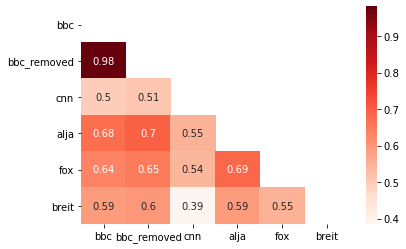

In [18]:
# create a dictionary that contains the value arrays
values_dict = {}
for i in range(len(names)):
    values_dict[names[i]] = values[i]

values_df = pd.DataFrame(values_dict)
news_data = values_df.corr(method=cosine)

# Get upper triangle of the matrix
matrix = np.triu(news_data)

# Create a heatmap to visualize cos values
sns.heatmap(news_data, annot=True, mask=matrix, cmap = "Reds")

### Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

Overall, I think none of these versions are highly similar. After removing the stop words and unifying the versions of quotation marks, aljazeera and Fox versions are most similiar, the cos between those versions is 0.687. The versions CNN and breitbart reported are least similar,the cos between these versions is 0.385.

I thought about removing the numbers and compare again, but I did not do it in the end, my understanding is that numbers mostly come from time and date, which can represent the degree of details each article reaches.

I glanced through the articles and manually removed "Media playback is unsupported on your device Media caption" which showed up 3 times in the BBC article. After removing this sentence, the similarity between bbc version and other versions on average increases 0.16. This seems pretty reasonable since the sentence is essentially irrelavent with the incident articles report. 